### Importación de datos



In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde las URLs
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


In [12]:
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [13]:
tienda1["tienda"] = "Tienda 1"
tienda2["tienda"] = "Tienda 2"
tienda3["tienda"] = "Tienda 3"
tienda4["tienda"] = "Tienda 4"

In [20]:
df_total = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

In [21]:
print(df_total.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'tienda'],
      dtype='object')


In [22]:
df_total["Precio"] = pd.to_numeric(df_total["Precio"], errors="coerce")

In [23]:
ventas_por_tienda = df_total.groupby("tienda")["Precio"].sum().sort_values()

In [24]:
print("Ventas totales por tienda:")
print(ventas_por_tienda)

Ventas totales por tienda:
tienda
Tienda 4    1.038376e+09
Tienda 3    1.098020e+09
Tienda 2    1.116344e+09
Tienda 1    1.150880e+09
Name: Precio, dtype: float64


In [25]:
tienda_menor_venta = ventas_por_tienda.idxmin()
total_menor_venta = ventas_por_tienda.min()

# 1. Análisis de facturación

In [26]:
print(f"\n📉 La tienda que menos factura es: **{tienda_menor_venta}**, con un total de ${total_menor_venta:,.2f}")


📉 La tienda que menos factura es: **Tienda 4**, con un total de $1,038,375,700.00


# 2. Ventas por categoría

In [28]:
df["Precio"] = pd.to_numeric(df["Precio"], errors="coerce")
df["Producto"] = df["Producto"].astype(str)

In [29]:
ventas_categoria = df.groupby("Producto")["Precio"].sum().sort_values(ascending=False)

In [30]:
print("🔍 Ventas totales por categoría de producto:")
print(ventas_categoria)

🔍 Ventas totales por categoría de producto:
Producto
TV LED UHD 4K                  432489600.0
Iphone 15                      401051200.0
Refrigerador                   384937400.0
Smart TV                       290221800.0
Lavadora de ropa               242468600.0
Lavavajillas                   240536500.0
Tablet ABXY                    219012800.0
Secadora de ropa               210238000.0
Celular ABXY                   157911100.0
Batería                        147806300.0
Cama king                      135780400.0
Estufa                         130871100.0
Guitarra eléctrica             129404800.0
Sofá reclinable                123279100.0
Microondas                     115699500.0
Cama box                       104097800.0
Bicicleta                       96487500.0
Armario                         96245800.0
Silla de oficina                69099000.0
Guitarra acústica               58898100.0
Mesa de noche                   58419500.0
Impresora                       56227300.0
K

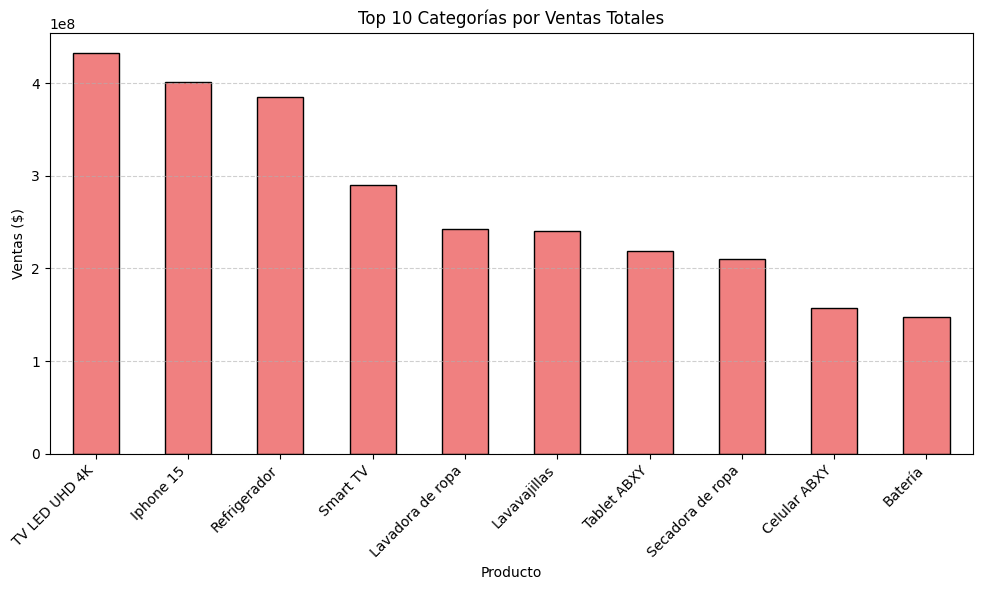

In [31]:
# Grafico
plt.figure(figsize=(10,6))
ventas_categoria.head(10).plot(kind="bar", color="lightcoral", edgecolor="black")
plt.title("Top 10 Categorías por Ventas Totales")
plt.ylabel("Ventas ($)")
plt.xlabel("Producto")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [32]:
ventas_tienda_producto = df.groupby(["tienda", "Producto"])["Precio"].sum().unstack(fill_value=0)

In [33]:
print("Ventas por tienda y categoría:")
print(ventas_tienda_producto)

Ventas por tienda y categoría:
Producto  Ajedrez de madera     Armario  Asistente virtual  Auriculares  \
tienda                                                                    
Tienda 1          1430600.0  29462300.0          8058000.0    5043700.0   
Tienda 2          1287700.0  26174900.0          7929500.0    3569600.0   
Tienda 3          1355300.0  24187200.0          8013300.0    3959400.0   
Tienda 4          1075500.0  16421400.0         10467300.0    3943600.0   

Producto  Auriculares con micrófono  Balón de baloncesto  Balón de voleibol  \
tienda                                                                        
Tienda 1                  4730800.0            2749800.0          2112200.0   
Tienda 2                  5644300.0            2091300.0          2289600.0   
Tienda 3                  5970500.0            2478100.0          2333800.0   
Tienda 4                  6402900.0            2439800.0          2364200.0   

Producto     Batería   Bicicleta  Bloques d

In [35]:
ventas_por_categoria = df.groupby("Producto")["Precio"].sum().sort_values(ascending=False)

In [36]:
# Mostrar la más vendida
categoria_mas_vendida = ventas_por_categoria.idxmax()
monto_mas_vendido = ventas_por_categoria.max()

In [37]:
# Mostrar la menos vendida
categoria_menos_vendida = ventas_por_categoria.idxmin()
monto_menos_vendido = ventas_por_categoria.min()

In [38]:
print(f"Categoría más vendida: {categoria_mas_vendida} con un total de ${monto_mas_vendido:,.2f}")
print(f"Categoría menos vendida: {categoria_menos_vendida} con un total de ${monto_menos_vendido:,.2f}")

Categoría más vendida: TV LED UHD 4K con un total de $432,489,600.00
Categoría menos vendida: Cubo mágico 8x8 con un total de $2,729,300.00


# 3. Calificación promedio de la tienda


In [39]:
df["Calificación"] = pd.to_numeric(df["Calificación"], errors="coerce")

In [40]:
# Calcular promedio de calificaciones por tienda
promedio_calificaciones = df.groupby("tienda")["Calificación"].mean().sort_values(ascending=False)

In [41]:
print("Promedio de calificaciones por tienda:")
print(promedio_calificaciones.round(2))

Promedio de calificaciones por tienda:
tienda
Tienda 3    4.05
Tienda 2    4.04
Tienda 4    4.00
Tienda 1    3.98
Name: Calificación, dtype: float64


# 4. Productos más y menos vendidos

In [ ]:
# Categoría más vendida: TV LED UHD 4K con un total de $432,489,600.00
# Categoría menos vendida: Cubo mágico 8x8 con un total de $2,729,300.00


# 5. Envío promedio por tienda

In [45]:
df["Costo de envío"] = pd.to_numeric(df["Costo de envío"], errors="coerce")

In [46]:
envio_promedio = df.groupby("tienda")["Costo de envío"].mean().round(2).sort_values()

In [47]:
print("Costo de envío promedio por tienda:")
print(envio_promedio)

Costo de envío promedio por tienda:
tienda
Tienda 4    23459.46
Tienda 3    24805.68
Tienda 2    25216.24
Tienda 1    26018.61
Name: Costo de envío, dtype: float64


In [ ]:
# Conclusion de análisis: ✅ La Tienda 4 tiene el peor rendimiento en términos de facturación total, ya que: Es la tienda que menos ingresos generó.